# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [56]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [57]:
ds['price'] = pd.to_numeric(ds['price'], errors='coerce')

ds = ds.dropna(subset=['price'])

most_expensive_index = ds['price'].idxmax()

most_expensive_home = ds.loc[most_expensive_index]

print("Most Expensive Home:")
print("id_realEstates:", ds['price'].idxmax()) 
print("Real Estate Agency:", most_expensive_home['realEstate_name'])
print("Price:", most_expensive_home['price'])
print("Location City:", most_expensive_home['level2'])
print("Location Zone:", most_expensive_home['level3'])
print("Location Zone of:", most_expensive_home['level4'])
print("# of bedrooms:", most_expensive_home['rooms'])
print("# of bathrooms:", most_expensive_home['bathrooms'])
print("Surface area:", most_expensive_home['surface'])


Most Expensive Home:
id_realEstates: 13110
Real Estate Agency: engel volkers torrelodones
Price: 8500000
Location City: Madrid
Location Zone: Zona Noroeste
Location Zone of: El Escorial, Zona de
# of bedrooms: 19.0
# of bathrooms: nan
Surface area: nan


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [58]:
zero_count_price=(ds["price"]==0).sum()
print("number of rows prices",zero_count_price)

number of rows prices 60


In [59]:
ds["price"].notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
15330    True
15331    True
15332    True
15333    True
15334    True
Name: price, Length: 15335, dtype: bool

In [60]:
home_price=ds[ds["price"]>0 & ds["price"].notnull()]


In [61]:

cheapest = home_price[home_price['price'] == home_price['price'].min()]
second_cheapest_home = home_price.nsmallest(2, 'price').iloc[-1]

print("1st Cheapest Home:")
print("Real Estate Agency:", cheapest['realEstate_name'].values[0])
print("Id_Real state:",cheapest["price"].idxmin())
print("Price:", cheapest['price'].values[0])
print("Location City:", cheapest['level2'].values[0])
print("Location Zone:", cheapest['level3'].values[0])
print("Location Zone of:", cheapest['level4'].values[0])
print("# of bedrooms:", cheapest['rooms'].values[0])
print("# of bathrooms:", cheapest['bathrooms'].values[0])
print("Surface area:", cheapest['surface'].values[0])


print(" ")
print("2nd Cheapest Home:")
print("Real Estate Agency:", second_cheapest_home['realEstate_name'])
print("Price:", second_cheapest_home['price'])
print("Location City:", second_cheapest_home['level2'])
print("Location Zone:", second_cheapest_home['level3'])
print("Location Zone of:", second_cheapest_home['level4'])
print("# of bedrooms:", second_cheapest_home['rooms'])
print("# of bathrooms:", second_cheapest_home['bathrooms'])
print("Surface area:", second_cheapest_home['surface'])

1st Cheapest Home:
Real Estate Agency: redpiso coslada
Id_Real state: 7491
Price: 600
Location City: Madrid
Location Zone: Corredor del Henares
Location Zone of: Coslada, Zona de
# of bedrooms: 3.0
# of bathrooms: 1.0
Surface area: 80.0
 
2nd Cheapest Home:
Real Estate Agency: haya real estate
Price: 16200
Location City: Madrid
Location Zone: Corredor del Henares
Location Zone of: Los Santos, Zona de
# of bedrooms: 1.0
# of bathrooms: 1.0
Surface area: 68.0


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [62]:
nan_count_surface=ds["surface"].isna().sum()
print("nan,",nan_count_surface)

nan, 1250


In [63]:
ds_clean=ds.dropna(subset=["surface"])

In [64]:
zero_surface_count = (ds_clean['surface'] == 0).sum()
print("Number of zero values in the 'surface' column:", zero_surface_count)

ds_surface_sorted = ds_clean.sort_values(by='surface')

biggest_home = ds_surface_sorted.iloc[-1]

smallest_home = ds_surface_sorted.iloc[0]

print("Details of surface area of biggest home:")
print("Real Estate Agency:", biggest_home['realEstate_name'])
print("Real Estate:",ds_clean['surface'].idxmax()) 
print("Surface area:", biggest_home['surface'])
print("Price:", biggest_home['price'])
print("Location City:", biggest_home['level2'])
print("Location Zone:", biggest_home['level3'])
print("Location Zone of:", biggest_home['level4'])
print("# of bedrooms:", biggest_home['rooms'])
print("# of bathrooms:", biggest_home['bathrooms'])

largest_surface_homes = ds_surface_sorted.nlargest(5, 'surface')
pd.DataFrame(largest_surface_homes)



print("Details of surface area of smallest home:")
print("Real Estate Agency:", smallest_home['realEstate_name'])
print("Real Estate:",ds_clean['surface'].idxmin()) 
print("Surface area:", smallest_home['surface'])
print("Price:", smallest_home['price'])
print("Location City:", smallest_home['level2'])
print("Location Zone:", smallest_home['level3'])
print("Location Zone of:", smallest_home['level4'])
print("# of bedrooms:", smallest_home['rooms'])
print("# of bathrooms:", smallest_home['bathrooms'])

smallest_surface_homes = ds_surface_sorted.nsmallest(5, 'surface')
pd.DataFrame(smallest_surface_homes)


Number of zero values in the 'surface' column: 0
Details of surface area of biggest home:
Real Estate Agency: habitarium inmobiliaria
Real Estate: 6794
Surface area: 249000.0
Price: 289000
Location City: Madrid
Location Zone: Zona Suroeste
Location Zone of: Sevilla la Nueva, Zona de
# of bedrooms: 3.0
# of bathrooms: 2.0
Details of surface area of smallest home:
Real Estate Agency: toledo21
Real Estate: 498
Surface area: 15.0
Price: 85000
Location City: Madrid
Location Zone: Madrid, Zona de
Location Zone of: nan
# of bedrooms: 1.0
# of bathrooms: 1.0


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
498,499,152817874,False,toledo21,910757382.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,1.0,15.0,85000,...,0,0,0,0,0,0,"40,40818","-3,70192",NaN,NaN
14361,14362,153920125,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/al...,NaN,1.0,18.0,89000,...,0,0,0,0,0,0,"40,40733","-3,69876",NaN,NaN
15320,15321,153901533,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,NaN,1.0,18.0,89000,...,0,0,0,0,0,0,"40,40733","-3,69876",NaN,NaN
1888,1889,153989797,False,vivienda2,912188609.0,https://www.fotocasa.es/vivienda/madrid-capita...,NaN,1.0,21.0,169000,...,0,0,0,0,0,0,"40,4002202213562","-3,70302392135624",NaN,NaN
9682,9683,153962563,False,haya real estate,911227078.0,https://www.fotocasa.es/es/comprar/vivienda/co...,1.0,1.0,21.0,94000,...,0,0,0,0,0,0,"40,42421257","-3,66674429",NaN,NaN


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [65]:
populations=ds['level5'].unique()
number_populations=len(populations)
print(number_populations)

168


#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [66]:
contain_nas=ds.isna().sum()
print(contain_nas)

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [67]:
df_realestate_drop=ds.dropna()
df_realestate_drop.isna().sum()

Unnamed: 0          0
id_realEstates      0
isNew               0
realEstate_name     0
phone_realEstate    0
url_inmueble        0
rooms               0
bathrooms           0
surface             0
price               0
date                0
description         0
address             0
country             0
level1              0
level2              0
level3              0
level4              0
level5              0
level6              0
level7              0
level8              0
upperLevel          0
countryId           0
level1Id            0
level2Id            0
level3Id            0
level4Id            0
level5Id            0
level6Id            0
level7Id            0
level8Id            0
accuracy            0
latitude            0
longitude           0
zipCode             0
customZone          0
dtype: int64

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [68]:
price_arroyomolinos=ds[ds["level5"]=="Arroyomolinos (Madrid)"]
mean_price_arroyomolinos=price_arroyomolinos['price'].mean()
print("Mean price in Arroyomolinos (Madrid):", mean_price_arroyomolinos)

Mean price in Arroyomolinos (Madrid): 294541.59854014596


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

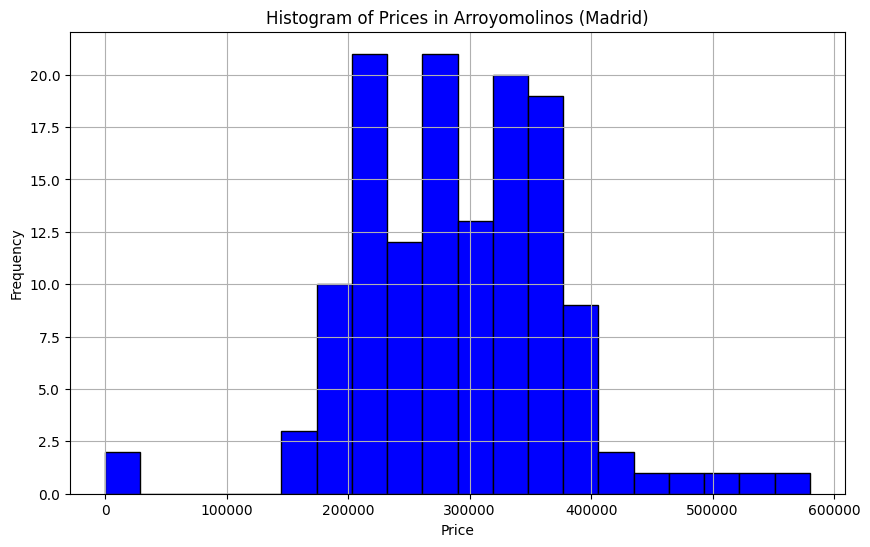

In [69]:
import matplotlib.pyplot as plt
arroyomolinos_prices = price_arroyomolinos['price']
plt.figure(figsize=(10, 6))
plt.hist(arroyomolinos_prices, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Prices in Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

under 30000 is frequency movement. Over 300000 does not have frequency. 

In [70]:
!pip install seaborn

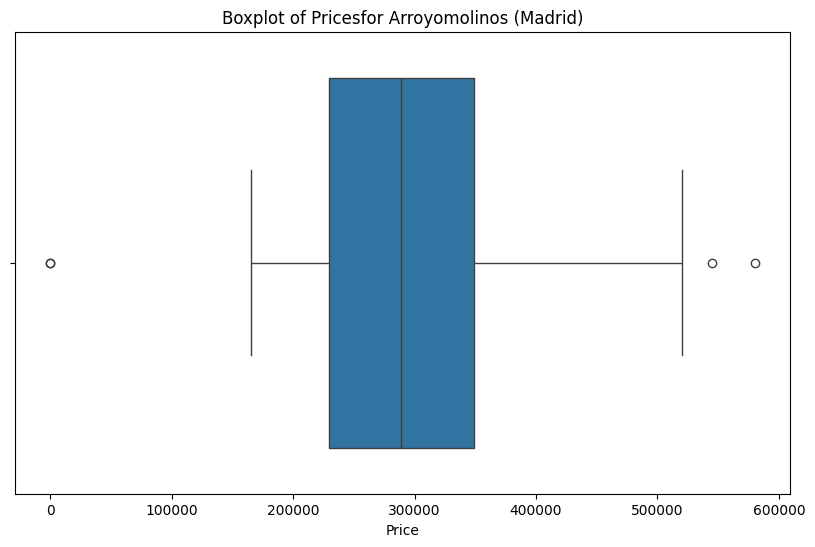

In [71]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=arroyomolinos_prices)
plt.title('Boxplot of Pricesfor Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

 #### Exercise 09. Is the average of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [72]:
filtered_data_frame = ds[['level5', 'price']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_data_frames_dict = {
    population: filtered_data_frame[filtered_data_frame['level5'] == population].dropna()
    for population in populations_to_filter
}
valdemorillo_average_price = population_data_frames_dict[populations_to_filter[0]]['price'].mean()
galapagar_average_price = population_data_frames_dict[populations_to_filter[1]]['price'].mean()
print()
print(f"{populations_to_filter[0]} this is the average of the:price {valdemorillo_average_price}")
print(f"{populations_to_filter[1]}  this is the average of the:price {galapagar_average_price}")
if valdemorillo_average_price == galapagar_average_price:
    print("If the average price is the same")
else:
    print("No the average is not the same")



Valdemorillo this is the average of the:price 363860.2931034483
Galapagar  this is the average of the:price 360063.20238095237
No the average is not the same


#### Exercise 10. Is the average of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [73]:
valdemorillo_properties = ds[ds['level5'] == 'Valdemorillo'].copy()
galapagar_properties = ds[ds['level5'] == 'Galapagar'].copy()

avg_price_valdemorillo = valdemorillo_properties['price'].mean()
avg_price_galapagar = galapagar_properties['price'].mean()

print("Average Price in Valdemorillo:", avg_price_valdemorillo)
print("Average Price in Galapagar:", avg_price_galapagar)

price_difference = abs(avg_price_valdemorillo - avg_price_galapagar)


if avg_price_valdemorillo > avg_price_galapagar:
    print("The average price in Valdemorillo is higher than in Galapagar.")
    print(f"The price difference is {price_difference:.2f} units.")

elif avg_price_valdemorillo < avg_price_galapagar:
    print("The average price in Galapagar is higher than in Valdemorillo.")
    print(f"The price difference is {price_difference:.2f} euros.")

else:
    print("The average prices in Valdemorillo and Galapagar are the same.")


Average Price in Valdemorillo: 363860.2931034483
Average Price in Galapagar: 360063.20238095237
The average price in Valdemorillo is higher than in Galapagar.
The price difference is 3797.09 units.


In [74]:
valdemorillo_properties['price_per_sqm'] = valdemorillo_properties['price'] / valdemorillo_properties['surface']
galapagar_properties['price_per_sqm'] = galapagar_properties['price'] / galapagar_properties['surface']

avg_price_per_sqm_valdemorillo = valdemorillo_properties['price_per_sqm'].mean()
avg_price_per_sqm_galapagar = galapagar_properties['price_per_sqm'].mean()

print("Average price per square meter in Valdemorillo:", avg_price_per_sqm_valdemorillo)
print("Average price per square meter in Galapagar:", avg_price_per_sqm_galapagar)

if avg_price_per_sqm_valdemorillo > avg_price_per_sqm_galapagar:
    print("The average price per square meter in Valdemorillo is higher than in Galapagar.")
elif avg_price_per_sqm_valdemorillo < avg_price_per_sqm_galapagar:
    print("The average price per square meter in Galapagar is higher than in Valdemorillo.")
else:
    print("The average price per square meter in Valdemorillo and Galapagar are the same.")


Average price per square meter in Valdemorillo: 1317.9502109024986
Average price per square meter in Galapagar: 1606.3240303094024
The average price per square meter in Galapagar is higher than in Valdemorillo.


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

In [75]:
valdemorillo_properties['price_per_sqm'] = valdemorillo_properties['price'] / valdemorillo_properties['surface'] 
galapagar_properties['price_per_sqm'] = galapagar_properties['price'] / galapagar_properties['surface']

avg_price_per_sqm_valdemorillo = valdemorillo_properties['price_per_sqm'].mean()
avg_price_per_sqm_galapagar = galapagar_properties['price_per_sqm'].mean()

print("Average price per square meter in Valdemorillo:", avg_price_per_sqm_valdemorillo)
print("Average price per square meter in Galapagar:", avg_price_per_sqm_galapagar)

if avg_price_per_sqm_valdemorillo > avg_price_per_sqm_galapagar: 
    print("The average price per square meter in Valdemorillo is higher than in Galapagar.") 
elif avg_price_per_sqm_valdemorillo < avg_price_per_sqm_galapagar: 
    print("The average price per square meter in Galapagar is higher than in Valdemorillo.") 
else: 
    print("The average price per square meter in Valdemorillo and Galapagar are the same.")

Average price per square meter in Valdemorillo: 1317.9502109024986
Average price per square meter in Galapagar: 1606.3240303094024
The average price per square meter in Galapagar is higher than in Valdemorillo.


In [76]:
import matplotlib.pyplot as plt

In [77]:
!pip install -r requirements.txt

In [78]:
!pip install matplotlib


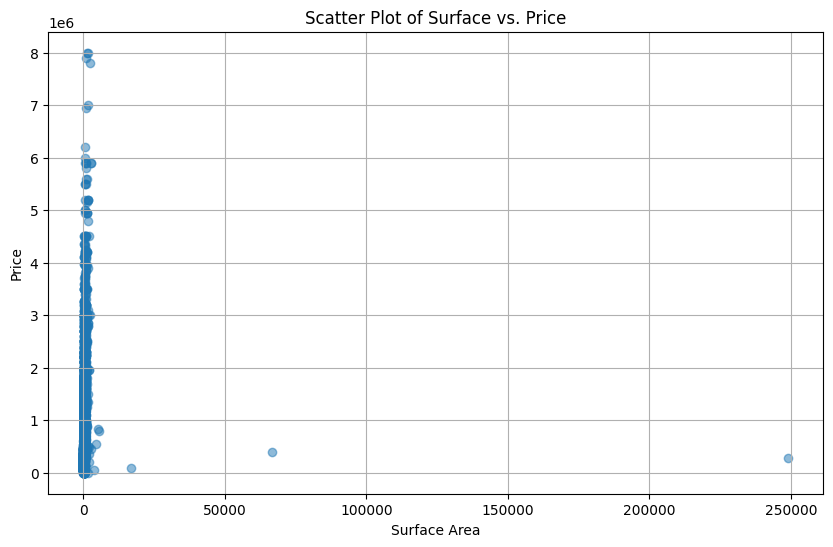

In [79]:
filtered_data = ds.dropna(subset=['surface', 'price'])
plt.figure(figsize=(10,6))
plt.scatter(filtered_data["surface"],filtered_data["price"], alpha=0.5)
plt.title('Scatter Plot of Surface vs. Price') 
plt.xlabel('Surface Area') 
plt.ylabel('Price') 
plt.grid(True) 
plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

The average price is frequency on 0 surface area. 

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [80]:
agencies=ds['realEstate_name'].unique()
number_agencies=len(agencies)
print(number_agencies)

1822


In [81]:
grouped_filtered = ds.groupby(['id_realEstates'])
grouped_filtered = grouped_filtered['id_realEstates']
print(len(grouped_filtered.size()))

14217


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [82]:
population_counts = ds['level5'].value_counts()
print(population_counts)

level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Brea de Tajo               1
El Atazar                  1
Piñuécar-gandullas         1
Braojos                    1
Montejo de la Sierra       1
Name: count, Length: 168, dtype: int64


In [83]:
most_common_population = population_counts.idxmax()
print("Population (level 5) with the most houses:", most_common_population)

Population (level 5) with the most houses:  Madrid Capital


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [84]:
populations_to_subset = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]


In [85]:
south_belt_subset = ds[ds['level5'].isin(populations_to_subset)]


In [86]:
south_belt_subset.head(3)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

In [87]:
median_prices = south_belt_subset.groupby('level5')['price'].median()


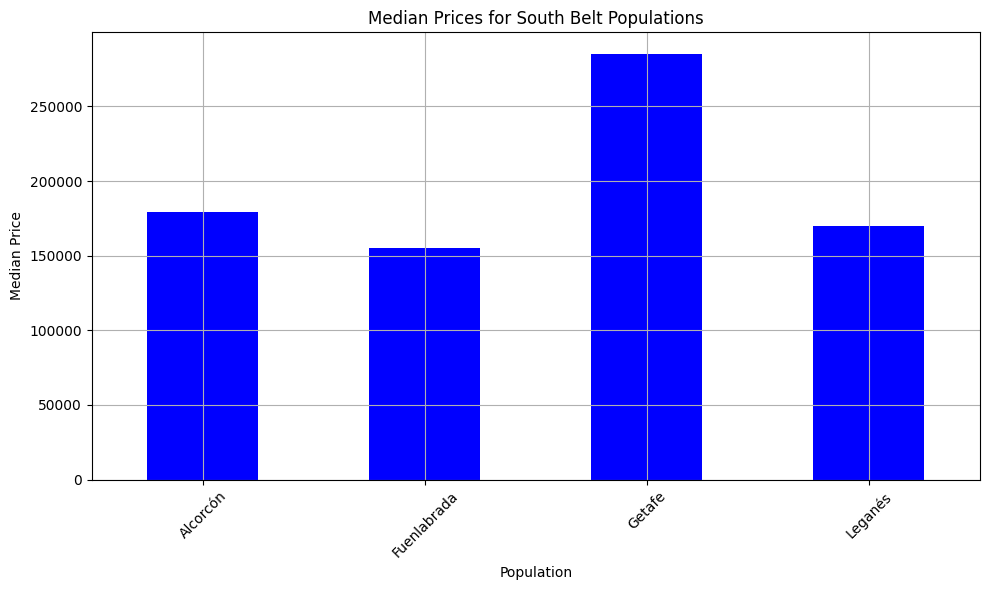

In [88]:
plt.figure(figsize=(10, 6))
median_prices.plot(kind='bar', color='blue')
plt.title('Median Prices for South Belt Populations')
plt.xlabel('Population')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

Getafe has high median price more than others. 

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [89]:
mean_price = south_belt_subset['price'].mean()
variance_price = south_belt_subset['price'].var()

mean_rooms = south_belt_subset['rooms'].mean()
variance_rooms = south_belt_subset['rooms'].var()

mean_surface = south_belt_subset['surface'].mean()
variance_surface = south_belt_subset['surface'].var()

mean_bathrooms = south_belt_subset['bathrooms'].mean()
variance_bathrooms = south_belt_subset['bathrooms'].var()

print("Sample Mean and Variance for Price in South Belt Subset:")
print("Mean:", mean_price)
print("Variance:", variance_price)

print("\nSample Mean and Variance for Rooms in South Belt Subset:")
print("Mean:", mean_rooms)
print("Variance:", variance_rooms)

print("\nSample Mean and Variance for Surface Area in South Belt Subset:")
print("Mean:", mean_surface)
print("Variance:", variance_surface)

print("\nSample Mean and Variance for Bathrooms in South Belt Subset:")
print("Mean:", mean_bathrooms)
print("Variance:", variance_bathrooms)


Sample Mean and Variance for Price in South Belt Subset:
Mean: 223094.48070562293
Variance: 14921367508.04902

Sample Mean and Variance for Rooms in South Belt Subset:
Mean: 3.0177383592017737
Variance: 0.7188858892927542

Sample Mean and Variance for Surface Area in South Belt Subset:
Mean: 111.75222363405337
Variance: 4263.051760316337

Sample Mean and Variance for Bathrooms in South Belt Subset:
Mean: 1.633221850613155
Variance: 0.5717968625577321


In [90]:
variable_stats = south_belt_subset[['price', 'rooms', 'surface', 'bathrooms']].describe()

print("Sample Mean and Variance for Variables in South Belt Subset:")
print(variable_stats)


Sample Mean and Variance for Variables in South Belt Subset:
              price       rooms     surface   bathrooms
count  9.070000e+02  902.000000  787.000000  897.000000
mean   2.230945e+05    3.017738  111.752224    1.633222
std    1.221530e+05    0.847871   65.292050    0.756173
min    0.000000e+00    1.000000   38.000000    1.000000
25%    1.349450e+05    3.000000   72.000000    1.000000
50%    1.750000e+05    3.000000   89.000000    1.000000
75%    3.070500e+05    3.000000  128.000000    2.000000
max    1.050000e+06    7.000000  722.000000    6.000000


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [91]:
for population in populations_to_subset:
    population_data = south_belt_subset[south_belt_subset['level5'] == population]
    
    if not population_data.empty:
        most_expensive_home = population_data.loc[population_data['price'].idxmax()]
        print("Most Expensive Home in", population, ":")
        print("Price:", most_expensive_home['price'])
        print("Real Estate Name:", most_expensive_home['realEstate_name'])
        print("Rea Estate ID:", most_expensive_home['id_realEstates'])
        print("\n")
    else:
        print("No data for", population)

Most Expensive Home in Fuenlabrada :
Price: 490000
Real Estate Name: unna madrid
Rea Estate ID: 153660921


Most Expensive Home in Leganés :
Price: 650000
Real Estate Name: bafre gestion y servicios inmobiliarios
Rea Estate ID: 152251506


Most Expensive Home in Getafe :
Price: 1050000
Real Estate Name: unna grupo inmobiliario
Rea Estate ID: 151105544


Most Expensive Home in Alcorcón :
Price: 950000
Real Estate Name: 100 home red inmobiliaria
Rea Estate ID: 153275915




#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

In [92]:
normalized_prices = south_belt_subset.groupby('level5')['price'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print(normalized_prices.head(5))


level5       
Alcorcón  85     0.018055
          109    0.388468
          765    0.182295
          816    0.241701
          827    0.033081
Name: price, dtype: float64


In [93]:
normalized_prices.head(5)

level5       
Alcorcón  85     0.018055
          109    0.388468
          765    0.182295
          816    0.241701
          827    0.033081
Name: price, dtype: float64

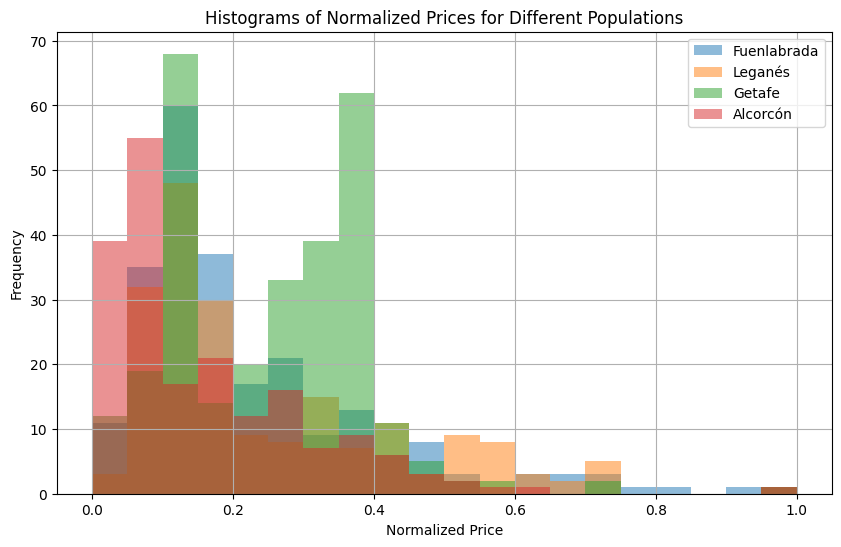

In [94]:
plt.figure(figsize=(10, 6))
for population in populations_to_subset:
    plt.hist(normalized_prices[population], bins=20, alpha=0.5, label=population)

plt.title('Histograms of Normalized Prices for Different Populations')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

Getafe has frequency between 0.0 to 0.4. Alcon has frequency between 0.0 to 0.2. other has not frequency. 

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [95]:
getafe_properties = ds[ds['level5'] == 'Getafe'].copy()
alcorcon_properties = ds[ds['level5'] == 'Alcorcón'].copy()

In [96]:
getafe_properties['price_per_sqm'] = getafe_properties['price'] / getafe_properties['surface']
alcorcon_properties['price_per_sqm'] = alcorcon_properties.apply(lambda row: row['price'] / row['surface'] if row['surface'] > 0 else 0, axis=1)

In [97]:
avg_price_per_sqm_getafe = getafe_properties['price_per_sqm'].mean()
avg_price_per_sqm_alcorcon = alcorcon_properties['price_per_sqm'].mean()


In [98]:
print("Average Price per Square Meter in Getafe:", avg_price_per_sqm_getafe)
print("Average Price per Square Meter in Alcorcón:", avg_price_per_sqm_alcorcon)


Average Price per Square Meter in Getafe: 2066.314949251463
Average Price per Square Meter in Alcorcón: 2038.943837234389


In [99]:
price_sqm_difference = abs(avg_price_per_sqm_getafe - avg_price_per_sqm_alcorcon)

In [100]:
if avg_price_per_sqm_getafe > avg_price_per_sqm_alcorcon:
    print("The average price per square meter in Getafe is higher than in Alcorcón.")
    print(f"The price difference is {price_sqm_difference:.2f} units.")

elif avg_price_per_sqm_getafe < avg_price_per_sqm_alcorcon:
    print("The average price per square meter in Alcorcón is higher than in Getafe.")
    print(f"The price difference is {price_sqm_difference:.2f} units.")

else:
    print("The average price per square meter is the same in both towns.")


The average price per square meter in Getafe is higher than in Alcorcón.
The price difference is 27.37 units.


In [101]:
num_rows_getafe = getafe_properties.shape[0]
num_rows_alcorcon = alcorcon_properties.shape[0]
print("Number of properties in Getafe subset:", num_rows_getafe)
print("Number of properties in Alcorcon subset:", num_rows_alcorcon)


Number of properties in Getafe subset: 290
Number of properties in Alcorcon subset: 190


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

In [102]:
populations_to_analyze = ['Valdemorillo', 'Galapagar', 'Getafe', 'Alcorcón']


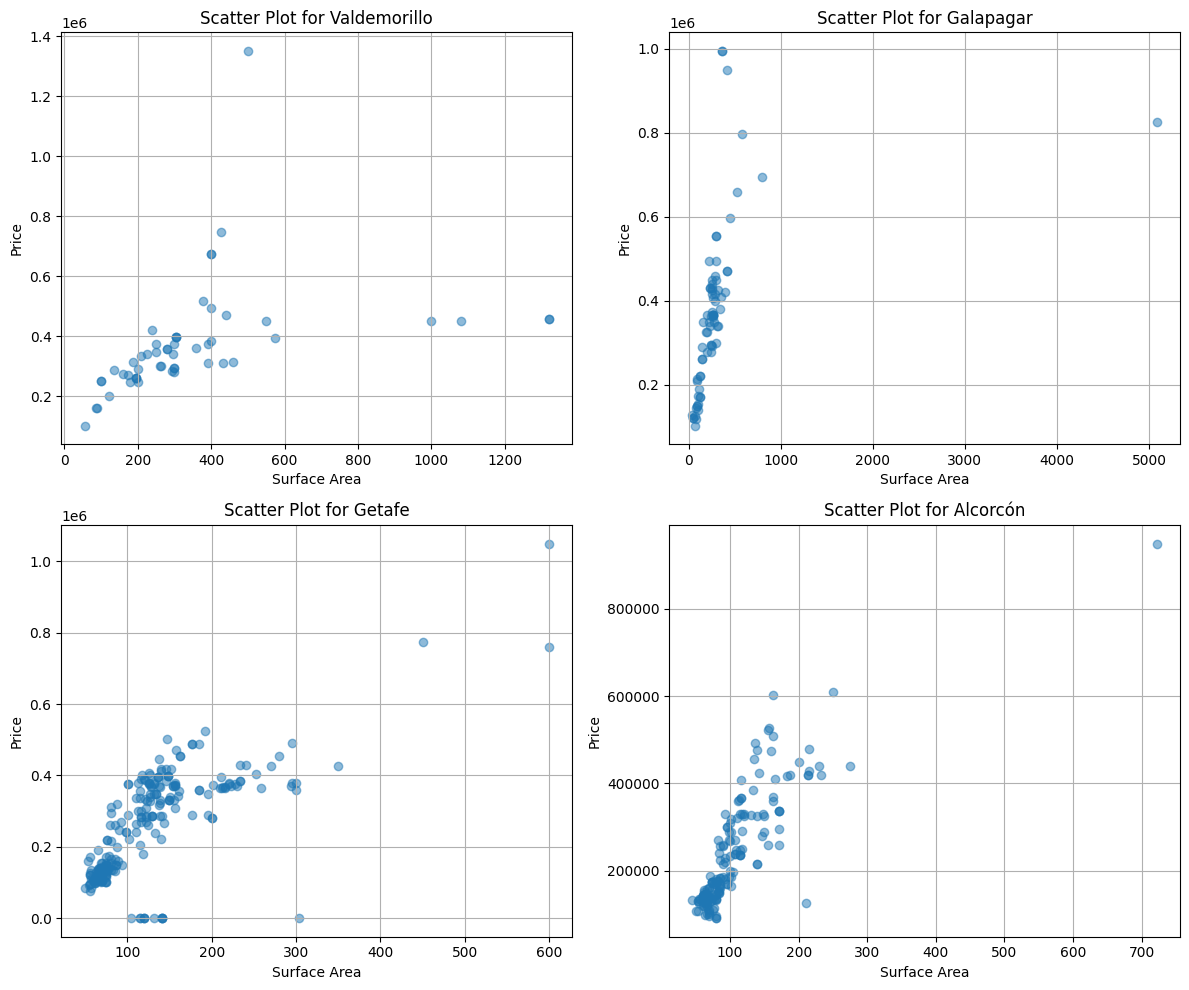

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, population in enumerate(populations_to_analyze):
    population_data = filtered_data[filtered_data['level5'] == population]
    axs[i].scatter(population_data['surface'], population_data['price'], alpha=0.5)
    axs[i].set_title(f'Scatter Plot for {population}')
    axs[i].set_xlabel('Surface Area')
    axs[i].set_ylabel('Price')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from ipyleaflet import Map, basemaps, CircleMarker, Marker


In [105]:
print(south_belt_subset[['latitude', 'longitude']].dtypes)


latitude     object
longitude    object
dtype: object


In [106]:
print(south_belt_subset)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

In [107]:
south_belt_subset['latitude'] = south_belt_subset['latitude'].astype(str)
south_belt_subset['longitude'] = south_belt_subset['longitude'].astype(str)


/tmp/ipykernel_1256/2901907967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_subset['latitude'] = south_belt_subset['latitude'].astype(str)
/tmp/ipykernel_1256/2901907967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_subset['longitude'] = south_belt_subset['longitude'].astype(str)


In [108]:
south_belt_subset['latitude'] = south_belt_subset['latitude'].str.replace(',', '.').astype(float)
south_belt_subset['longitude'] = south_belt_subset['longitude'].str.replace(',', '.').astype(float)

/tmp/ipykernel_1256/3366430287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_subset['latitude'] = south_belt_subset['latitude'].str.replace(',', '.').astype(float)
/tmp/ipykernel_1256/3366430287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_subset['longitude'] = south_belt_subset['longitude'].str.replace(',', '.').astype(float)


In [109]:
map = Map(center = (40.317755279476394, -3.784103393554688), zoom = 12.0, 
    basemap=basemaps.Stamen.Terrain)
for index, row in south_belt_subset.iterrows():
    latitude = row["latitude"] 
    longitude = row["longitude"] 
    marker = CircleMarker(location=(latitude, longitude), radius=7,
                          color="blue", fill_color="blue", stroke_width=-500)
    map.add_layer(marker)
map


Map(center=[40.317755279476394, -3.784103393554688], controls=(ZoomControl(options=['position', 'zoom_in_text'…